In [13]:
#Importacion de librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, Normalizer, LabelEncoder
from sklearn.compose import ColumnTransformer

In [14]:
#Lectura del dataset
df = pd.read_csv("./Datasets/meteorite-landings.csv")
print("Datos originales:", df.shape)
df.head()

Datos originales: (45716, 10)


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [15]:
#Exploracion inicial de los datos
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB
None
          name            id nametype recclass          mass   fall  \
count    45716  45716.000000    45716    45716  4.558500e+04  45716   
unique   45716           NaN        2      466           NaN      2   
top     Aachen           NaN    Valid       L6           NaN  Found   
freq         1           NaN    4564

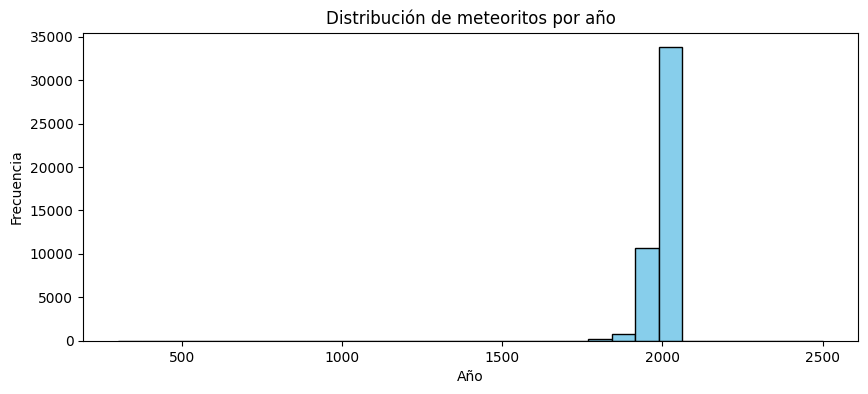

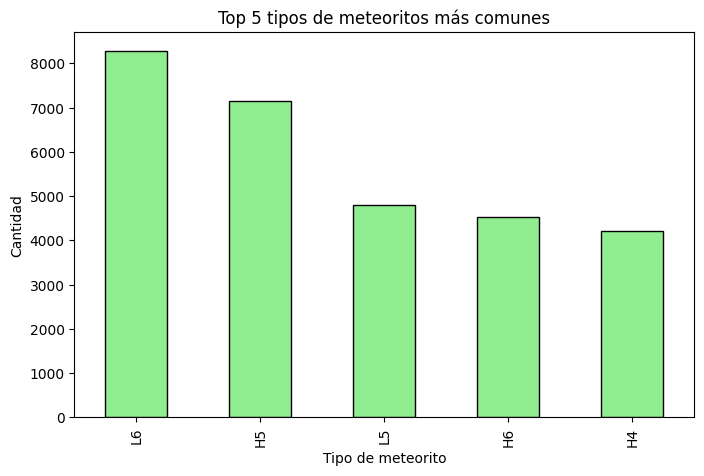

In [16]:

#Grafica de la distribucion de meteoritos por año
plt.figure(figsize=(10, 4))
plt.hist(df['year'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de meteoritos por año")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.show()

#Grafica para mostrar llos 5 tipos de meteoritos mas comunes que han caido en la tierra
top_classes = df['recclass'].value_counts().head(5)
plt.figure(figsize=(8, 5))
top_classes.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 5 tipos de meteoritos más comunes")
plt.xlabel("Tipo de meteorito")
plt.ylabel("Cantidad")
plt.show()

In [17]:
#Limpieza de datos 

# Filtrar años válidos (860 dC - 2016 dC)
df = df[(df['year'] >= 860) & (df['year'] <= 2016)]

# Filtrar coordenadas válidas
df = df[(df['reclong'].between(-180, 180)) & ((df['reclat'] != 0) | (df['reclong'] != 0))]

# Eliminar filas con datos nulos en las columnas de interés y resetear índices
df = df.dropna(subset=['year', 'reclat', 'reclong', 'mass', 'recclass'])
df.reset_index(drop=True, inplace=True)

print(f'Dimensiones finales {df.shape}')
df.head()

Dimensiones finales (31929, 10)


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [18]:
#Preparacion de datos, para el modelo de clasificación
# Seleccionar características y objetivo (útiles para el modelo)
features = df[['nametype', 'fall', 'mass', 'reclat', 'reclong', 'year']]
targets = df['recclass']

# Definir las columnas por tipo
cathegorical_features = ['nametype', 'fall']
numerical_features = ['mass', 'year']
coord_features = ['reclat', 'reclong']

# Crear el transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cathegorical_features),
        ('num', MinMaxScaler(), numerical_features),
        ('coord', Normalizer(), coord_features)
    ])

# Codificar etiquetas de salida
label_encoder = LabelEncoder()

# Aplicar las transformaciones a las características y las etiquetas
X = preprocessor.fit_transform(features)
y = label_encoder.fit_transform(targets)

In [22]:
print("Características transformadas:", X.shape)
print("Número de etiquetas únicas:", len(set(y)))
print("Ejemplo de targets codificados:", y[:10])
print("Clases ejemplo:", label_encoder.classes_[:10])

Características transformadas: (31929, 8)
Número de etiquetas únicas: 392
Ejemplo de targets codificados: [284 164  69   0 289  69 298 157 289 208]
Clases ejemplo: ['Acapulcoite' 'Acapulcoite/Lodranite' 'Achondrite-ung' 'Angrite'
 'Aubrite' 'Aubrite-an' 'Brachinite' 'C' 'C1/2-ung' 'C2']


In [23]:
#Guardar dataset limpio
path = './Datasets/meteorite-landings-limpio.csv'
df.to_csv(path, index=False)

print(f'Dataset limpio guardado en: {path}')

Dataset limpio guardado en: ./Datasets/meteorite-landings-limpio.csv
